<a href="https://colab.research.google.com/github/IshaSinghVatsa/MACHINE-LEARNING/blob/main/CAT1_2147251_ML_Ques1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the necessary libraries
from dataclasses import dataclass
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib as plt
import sklearn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("/content/India_Menu.csv", encoding= 'unicode_escape')
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggieâ¢ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki BurgerÂ®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicyâ¢ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


checking if their are any null values

In [ ]:
df.isnull().any()

Menu Category             False
Menu Items                False
Per Serve Size            False
Energy (kCal)             False
Protein (g)               False
Total fat (g)             False
Sat Fat (g)               False
Trans fat (g)             False
Cholesterols (mg)         False
Total carbohydrate (g)    False
Total Sugars (g)          False
Added Sugars (g)          False
Sodium (mg)                True
dtype: bool

replacing the null values with 0

In [ ]:
df.replace(np.NAN,0,inplace=True)

again checking for null values but now all are removed

In [ ]:
df.isnull().any()

Menu Category             False
Menu Items                False
Per Serve Size            False
Energy (kCal)             False
Protein (g)               False
Total fat (g)             False
Sat Fat (g)               False
Trans fat (g)             False
Cholesterols (mg)         False
Total carbohydrate (g)    False
Total Sugars (g)          False
Added Sugars (g)          False
Sodium (mg)               False
dtype: bool

converting all float values to integer 

In [ ]:
#df['Gender'] = labelEn.fit_transform(df['Gender'])

df['Energy (kCal)'] = df['Energy (kCal)'].astype('int')
df['Protein (g)'] = df['Protein (g)'].astype('int')
df['Total fat (g)'] = df['Total fat (g)'].astype('int')
df['Sat Fat (g)'] = df['Sat Fat (g)'].astype('int')
df['Trans fat (g)'] = df['Trans fat (g)'].astype('int')
df['Cholesterols (mg)'] = df['Cholesterols (mg)'].astype('int')
df['Total carbohydrate (g)'] = df['Total carbohydrate (g)'].astype('int')
df['Total Sugars (g)'] = df['Total Sugars (g)'].astype('int')
df['Added Sugars (g)'] = df['Added Sugars (g)'].astype('int')
df['Sodium (mg)'] = df['Sodium (mg)'].astype('int')

In [ ]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggieâ¢ Burger,168 g,402,10,13,5,0,2,56,7,4,706
1,Regular Menu,McAloo Tikki BurgerÂ®,146 g,339,8,11,4,0,1,50,7,4,545
2,Regular Menu,McSpicyâ¢ Paneer Burger,199 g,652,20,39,17,0,21,52,8,5,1074
3,Regular Menu,Spicy Paneer Wrap,250 g,674,20,39,19,0,40,59,3,1,1087
4,Regular Menu,American Veg Burger,177 g,512,15,23,10,0,25,56,7,4,1051


In [ ]:
df.drop(['Per Serve Size'],axis=1)

,Menu Category,Menu Items,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggieâ¢ Burger,402,10,13,5,0,2,56,7,4,706
1,Regular Menu,McAloo Tikki BurgerÂ®,339,8,11,4,0,1,50,7,4,545
2,Regular Menu,McSpicyâ¢ Paneer Burger,652,20,39,17,0,21,52,8,5,1074
3,Regular Menu,Spicy Paneer Wrap,674,20,39,19,0,40,59,3,1,1087
4,Regular Menu,American Veg Burger,512,15,23,10,0,25,56,7,4,1051
...,...,...,...,...,...,...,...,...,...,...,...,...
136,Condiments Menu,Tomato Ketchup Sachets,11,0,23,0,0,0,2,2,1,71
137,Condiments Menu,Maple Syrup,86,0,0,0,0,0,21,16,5,15
138,Condiments Menu,Cheese Slice,51,3,3,2,0,13,0,0,0,178
139,Condiments Menu,Sweet Corn,45,1,1,0,0,2,7,2,0,0


Here we are going to perform classification on column Protein and Added Sugar

In [ ]:
x=df.iloc[:,[3]].values
y=df.iloc[:,[-2]].values

In [ ]:
le=LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])

Here we are deviding the whole data set into training and test datasets in ratio of 80 and 20 respectively

In [ ]:
#variables for assigning training and test values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)



Here Tranformation is happening of the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler



In [ ]:
sc=StandardScaler()



In [ ]:
x_train=sc.fit_transform(x_train)

x_test=sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: ignored

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_test

array([[2.60500e+01],
       [2.09090e+02],
       [3.90740e+02],
       [1.55060e+02],
       [7.02600e+01],
       [2.16790e+02],
       [1.76900e+01],
       [1.65360e+02],
       [4.98900e+01],
       [7.66330e+02],
       [1.02600e+01],
       [7.57910e+02],
       [2.79000e+00],
       [3.47400e+01],
       [2.02000e+00],
       [1.00890e+02],
       [1.17427e+03],
       [1.39970e+02],
       [1.40000e+01],
       [1.54980e+02],
       [1.85730e+02],
       [7.04810e+02],
       [1.50000e+01],
       [7.15830e+02],
       [1.07458e+03],
       [        nan],
       [1.53150e+02],
       [2.51500e+01],
       [2.39949e+03]])

In [ ]:
y_pred

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

For printinmg confusion matrix and accuracy

In [ ]:
#Confusion Matrix

cm
ac

NameError: ignored

The above error I was not able to resolve but this is the whole code for Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(x_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

**Question 2-- Kmeans clustering with elbow method**

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:

df = pd.read_csv("/content/India_Menu.csv")
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


-->Here I am checking if their is any null values so 'Sodium' has one.

In [ ]:
df.isnull().any()

Menu Category             False
Menu Items                False
Per Serve Size            False
Energy (kCal)             False
Protein (g)               False
Total fat (g)             False
Sat Fat (g)               False
Trans fat (g)             False
Cholesterols (mg)         False
Total carbohydrate (g)    False
Total Sugars (g)          False
Added Sugars (g)          False
Sodium (mg)                True
dtype: bool

-->Here I am replacing null values to 0 

In [ ]:
df.replace(np.NAN,0,inplace=True)

-->Here I am again checking if any null values are left. All are false so no null values left

In [ ]:
df.isnull().any()

Menu Category             False
Menu Items                False
Per Serve Size            False
Energy (kCal)             False
Protein (g)               False
Total fat (g)             False
Sat Fat (g)               False
Trans fat (g)             False
Cholesterols (mg)         False
Total carbohydrate (g)    False
Total Sugars (g)          False
Added Sugars (g)          False
Sodium (mg)               False
dtype: bool

-->Here clustering is applied between two columns - Protein and Energy
   and a scatter plot is plotted for the same

Text(0, 0.5, 'Protein(g)')

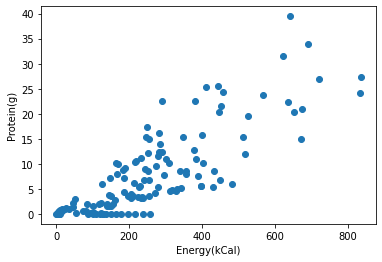

In [ ]:
plt.scatter(df['Energy (kCal)'],df['Protein (g)'])
plt.xlabel('Energy(kCal)')
plt.ylabel('Protein(g)')

Here whole graph is devided into 3 clusters in the group of 0,1 and 2.

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Energy (kCal)','Protein (g)']])
y_predicted

array([0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),cluster
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,0
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,2
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,2
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,2


-->These are coordinates which are cluster centers of three clusters respectively

In [ ]:
km.cluster_centers_

array([[306.04596774,   9.64532258],
       [ 92.8490625 ,   1.87359375],
       [638.42733333,  22.578     ]])

-->Here the scatter plot is devided into three clusters and all have their cluster centers shown with '*'

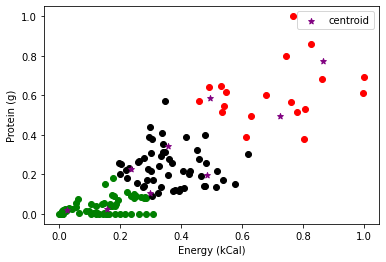

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Energy (kCal)'],df1['Protein (g)'],color='green')
plt.scatter(df2['Energy (kCal)'],df2['Protein (g)'],color='red')
plt.scatter(df3['Energy (kCal)'],df3['Protein (g)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Energy (kCal)')
plt.ylabel('Protein (g)')
plt.legend()


-->Here dataset is getting transformed for further clustering

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Protein (g)']])
df['Protein (g)'] = scaler.transform(df[['Protein (g)']])

scaler.fit(df[['Energy (kCal)']])
df['Energy (kCal)'] = scaler.transform(df[['Energy (kCal)']])

df.head()


,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),cluster
0,Regular Menu,McVeggie™ Burger,168 g,0.481866,0.259438,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,0
1,Regular Menu,McAloo Tikki Burger®,146 g,0.406923,0.215353,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0
2,Regular Menu,McSpicy™ Paneer Burger,199 g,0.782348,0.514061,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,2
3,Regular Menu,Spicy Paneer Wrap,250 g,0.808620,0.531036,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,2
4,Regular Menu,American Veg Burger,177 g,0.613848,0.387636,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,2


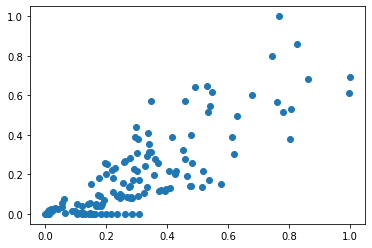

In [ ]:
plt.scatter(df['Energy (kCal)'],df['Protein (g)'])


-->Here clustering of normalised dataset is performed

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Energy (kCal)','Protein (g)']])
y_predicted


array([2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()


,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),cluster
0,Regular Menu,McVeggie™ Burger,168 g,0.481866,0.259438,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,2
1,Regular Menu,McAloo Tikki Burger®,146 g,0.406923,0.215353,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,2
2,Regular Menu,McSpicy™ Paneer Burger,199 g,0.782348,0.514061,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1
3,Regular Menu,Spicy Paneer Wrap,250 g,0.808620,0.531036,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1
4,Regular Menu,American Veg Burger,177 g,0.613848,0.387636,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1


-->cluster centers of normalised dataset

In [ ]:
km.cluster_centers_


array([[0.1258758 , 0.03371883],
       [0.70463021, 0.61401731],
       [0.35914553, 0.23722659]])

-->These clusters have only on centrid each 

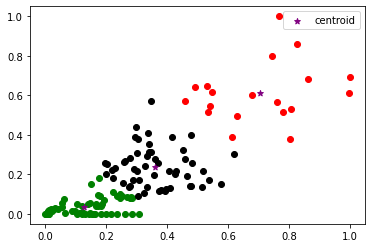

In [ ]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Energy (kCal)'],df1['Protein (g)'],color='green')
plt.scatter(df2['Energy (kCal)'],df2['Protein (g)'],color='red')
plt.scatter(df3['Energy (kCal)'],df3['Protein (g)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()



-->Now here we are performing elbow method and according to the graph optimum number of clusters could be 2 or 3.

And as we can see that before preprocessing(normalisation) there were total 8 centroids were coming for three clusters but after normalisation centroids reduced to three. here importance of preprocessing can be seen.

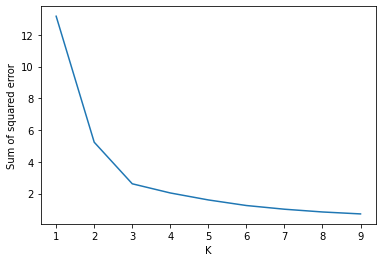

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Energy (kCal)','Protein (g)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)